# Bài kiểm tra cuối môn: LDS3 
### Cho dữ liệu housing-prices-dataset/train.csv
### Yêu cầu: Thực hiện các công việc sau
1. Xác định các thuộc tính
2. Phân tích đơn biến  
   Để dự đoán giá nhà, giả sử cần các thông tin sau: 'LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 
   'TotRmsAbvGrd' => phân tích các biến này
3. Phân tích hai biến
4. Xử lý dữ liệu thiếu
5. Phát hiện và xử lý ngoại lệ

In [1]:
# link: https://www.kaggle.com/alphaepsilon/housing-prices-dataset

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

In [3]:
df = pd.read_csv("housing-prices-dataset/train.csv")
df.shape

(1460, 81)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## 1. Xác định các thuộc tính
1. Input: Tất cả ngoại trừ SalePrice
2. Output: SalePrice
3. Type of variable: <br/>
    3.1 Predictor: khác SalePrice <br/>
    3.2 Target: SalePrice <br/>
4. Data Type: <br/>
    4.1 Charactor/String <br/>
    4.2 Numeric <br/>
5. Variable Category:<br/>
    5.1 Categorical: kieu so, kieu chuoi  <br/>
    5.2 Continuous: int, float

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
#Tạo danh sách các cột kiểu số 
numbers = [f for f in df.columns if df.dtypes[f] != 'object'] # Quantitative: # du lieu kieu so
list_nums = ', '.join(numbers)
list_nums

'Id, MSSubClass, LotFrontage, LotArea, OverallQual, OverallCond, YearBuilt, YearRemodAdd, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageYrBlt, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SalePrice'

In [7]:
# Tạo danh sách cột kiểu chuỗi
objects = [f for f in df.columns if df.dtypes[f] == 'object'] # Qualitative : # du lieu kieu chuoi
list_obj = ', '.join(objects)
list_obj

'MSZoning, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Heating, HeatingQC, CentralAir, Electrical, KitchenQual, Functional, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, PavedDrive, PoolQC, Fence, MiscFeature, SaleType, SaleCondition'

In [8]:
# Categorical: 
# Duyệt qua các biến chuỗi, in ra các giá trị có trong mỗi biến -->  xem xet cac bien phan loai kieu chuoi
# Với kết quả in ra, xác định các biến kiểu số thuộc loại Categorical 
i = 1
for obj in objects:
    print(i, "/", obj, "\t",len(df[obj].unique()),":", df[obj].unique())
    i = i+1

1 / MSZoning 	 5 : ['RL' 'RM' 'C (all)' 'FV' 'RH']
2 / Street 	 2 : ['Pave' 'Grvl']
3 / Alley 	 3 : [nan 'Grvl' 'Pave']
4 / LotShape 	 4 : ['Reg' 'IR1' 'IR2' 'IR3']
5 / LandContour 	 4 : ['Lvl' 'Bnk' 'Low' 'HLS']
6 / Utilities 	 2 : ['AllPub' 'NoSeWa']
7 / LotConfig 	 5 : ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
8 / LandSlope 	 3 : ['Gtl' 'Mod' 'Sev']
9 / Neighborhood 	 25 : ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
10 / Condition1 	 9 : ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
11 / Condition2 	 8 : ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
12 / BldgType 	 5 : ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
13 / HouseStyle 	 8 : ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
14 / RoofStyle 	 6 : ['Gable' 'Hip' 'Gambrel

In [9]:
# Duyệt qua các biến kiểu số in ra các giá trị phân biệt có trong cột (chỉ in các giá trị khi số giá trị phân biệt nhỏ hơn 120)
# Với kết quả in ra, xác định các biến kiểu số thuộc loại Categorical 
i = 1
for obj in numbers:
    print(i, "/", obj, "\t",len(df[obj].unique()),":", df[obj].unique() if len(df[obj].unique())<120 else '')
    i = i+1

1 / Id 	 1460 : 
2 / MSSubClass 	 15 : [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
3 / LotFrontage 	 111 : [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
4 / LotArea 	 1073 : 
5 / OverallQual 	 10 : [ 7  6  8  5  9  4 10  3  1  2]
6 / OverallCond 	 9 : [5 8 6 7 4 2 3 9 1]
7 / YearBuilt 	 112 : [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 19

In [10]:
# - Quan sát 2 kết quả trên để kết luận, xác định tập features. Trong phần tiếp theo giả sử chúng ta chỉ làm việc với các 
# features = 'LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd'   

## 2. Phân tích đơn biến

In [11]:
features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']

### 2.1. Với mỗi biến continuous. Hãy thực hiện các yêu cầu sau: 
- Vẽ đồ thị gồm 2 phần: histogram và boxplot của biến.
- Tìm mean, mode, độ nghiêng, độ nhọn  --> Nhận xét có phân phối chuẩn không.
- Nếu không phải phân phối chuẩn: xác định Q1, Q3, IQR, Oulier Upper, Outlier Lower
  Nếu là phân phối chuẩn: xác định Oulier Upper, Outlier Lower theo Z-score
- Xác định tập dữ  outlier trên và dưới. 
- Kiểm tra nếu tổng số các outlier nhỏ hơn 5% số phần tử tổng thể thì -->  xóa các outlier này khỏi tập dữ liệu. 
#### Danh sách các biến Continuous cần thực hiện
- LotArea
- 1stFlrSF
- 2ndFlrS

<ipython-input-12-68f8cbe705b3>:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(column=features, ax=axes)


array([[<AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'YearBuilt'}>,
        <AxesSubplot:title={'center':'1stFlrSF'}>],
       [<AxesSubplot:title={'center':'2ndFlrSF'}>,
        <AxesSubplot:title={'center':'FullBath'}>,
        <AxesSubplot:title={'center':'BedroomAbvGr'}>],
       [<AxesSubplot:title={'center':'TotRmsAbvGrd'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

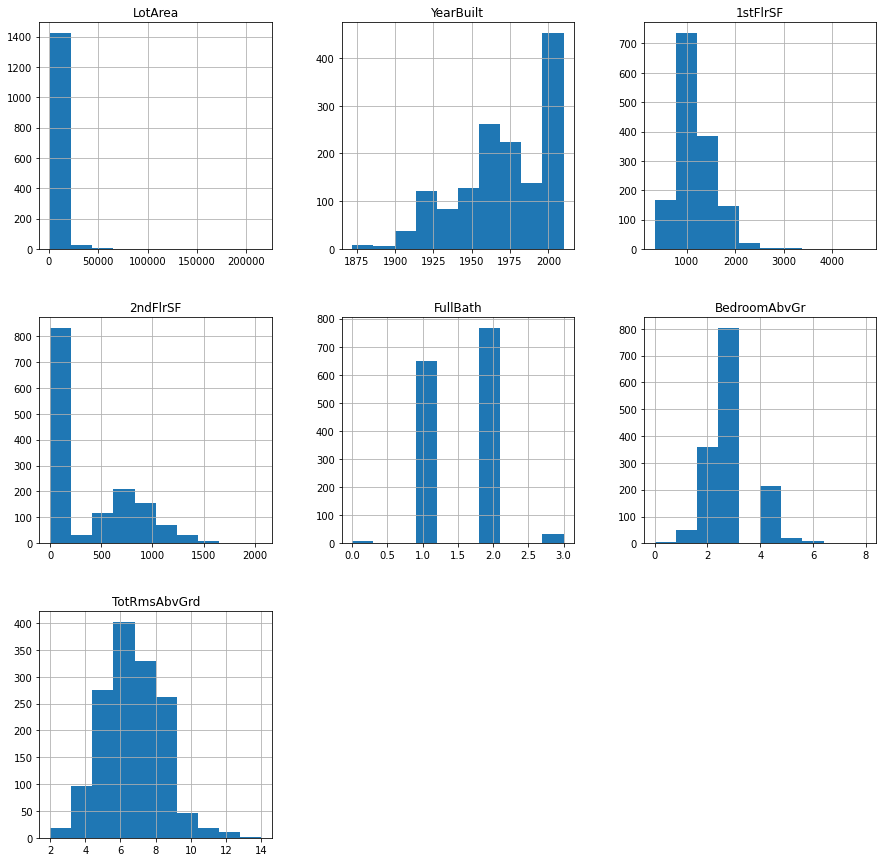

In [12]:
filtered_df = df[features]
# Vẽ đồ thị gồm 2 phần: histogram và boxplot của biến.
import matplotlib.pyplot as plt
fig, axes = plt.subplots(figsize=(15,15))
df.hist(column=features, ax=axes)


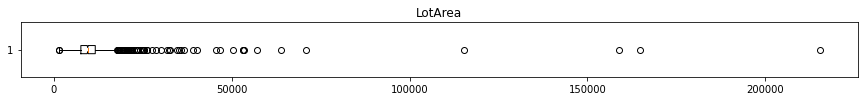

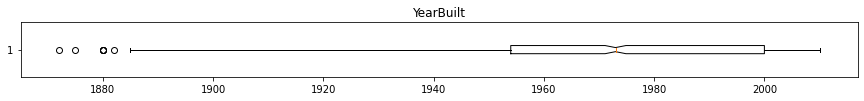

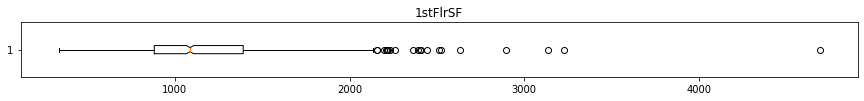

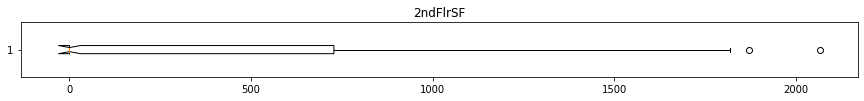

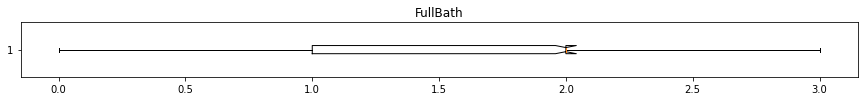

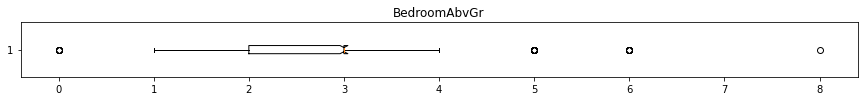

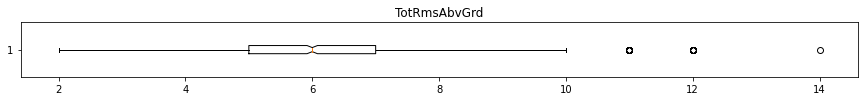

In [13]:
for f in features:
    fig1, ax1 = plt.subplots()
    fig1.set_figwidth(15)
    fig1.set_figheight(1)
    ax1.boxplot(df[f], notch = True, vert = False)
    ax1.set_title(f) 
    plt.show() 

In [14]:
# Tìm mean, mode, độ nghiêng, độ nhọn --> Nhận xét có phân phối chuẩn không.
for f in features:
    print(f)
    print('mean:', df[f].mean())
    print('mode:', df[f].mode())
    print('skewness:', df[f].skew())
    print('kurtosis:', df[f].kurtosis())
    print('-'*20)

LotArea
mean: 10516.828082191782
mode: 0    7200
dtype: int64
skewness: 12.207687851233496
kurtosis: 203.24327101886033
--------------------
YearBuilt
mean: 1971.267808219178
mode: 0    2006
dtype: int64
skewness: -0.613461172488183
kurtosis: -0.43955194159361977
--------------------
1stFlrSF
mean: 1162.626712328767
mode: 0    864
dtype: int64
skewness: 1.3767566220336365
kurtosis: 5.74584148244079
--------------------
2ndFlrSF
mean: 346.99246575342465
mode: 0    0
dtype: int64
skewness: 0.8130298163023265
kurtosis: -0.5534635576075795
--------------------
FullBath
mean: 1.5650684931506849
mode: 0    2
dtype: int64
skewness: 0.036561558402727165
kurtosis: -0.8570428212743262
--------------------
BedroomAbvGr
mean: 2.8664383561643834
mode: 0    3
dtype: int64
skewness: 0.21179009627507137
kurtosis: 2.230874582191236
--------------------
TotRmsAbvGrd
mean: 6.517808219178082
mode: 0    6
dtype: int64
skewness: 0.6763408364355531
kurtosis: 0.8807615657189474
--------------------


In [15]:
def remove_outliers(raw_data, outlier_indexs):
    print('outlier_indexs', outlier_indexs, len(outlier_indexs))
    print('raw_data', raw_data)
    if len(outlier_indexs) < 0.05 * len(raw_data):
        print(np.delete(raw_data, outlier_indexs))

In [25]:
# Nếu không phải phân phối chuẩn: xác định Q1, Q3, IQR, Oulier Upper, Outlier Lower.
# căn cứ độ nhọn lớn hơn 0 (theo Kurtosis) => phân bố này nhọn hơn phân bố chuẩn
# các phân bố không phải phân phối chuẩn gồm:
un_standards = ['LotArea', '1stFlrSF', 'BedroomAbvGr', 'TotRmsAbvGrd']
un_standards_df = df[un_standards]
Q1 = un_standards_df.quantile(0.25)
Q3 = un_standards_df.quantile(0.75)
IQR = Q3-Q1

for u in un_standards:
    us = df[u]
    us_Q1 = Q1[u]
    us_Q3 = Q3[u]
    IQR = Q3[u] - Q1[u]
    us_out = us[~((us < (us_Q1 - 1.5 * IQR)) |(us > (us_Q3 + 1.5 * IQR)))]
    print(us_out)
    print('Q1:', us_Q1)
    print('Q3:', us_Q3)
    print('IQR:', IQR)
    print('Oulier Upper:', us[us > (us_Q3 + 1.5 * IQR)].values)
    print('Outlier Lower:', us[us < (us_Q1 - 1.5 * IQR)].values)
    print(np.delete(us, us_out))

0        8450
1        9600
2       11250
3        9550
4       14260
        ...  
1455     7917
1456    13175
1457     9042
1458     9717
1459     9937
Name: LotArea, Length: 1391, dtype: int64
Q1: 7553.5
Q3: 11601.5
IQR: 4048.0
Oulier Upper: [ 50271  19900  21000  21453  19378  31770  22950  25419 159000  19296
  39104  19138  18386 215245 164660  20431  18800  53107  34650  22420
  21750  70761  53227  40094  32668  21872  21780  25095  46589  20896
  18450  21535  26178 115149  21695  53504  21384  28698  45600  17920
  25286  27650  24090  25000  21286  21750  29959  18000  23257  17755
  35760  18030  35133  32463  18890  24682  23595  17871  36500  63887
  20781  25339  57200  20544  19690  21930  26142]
Outlier Lower: [1300 1477]


IndexError: index 8450 is out of bounds for axis 0 with size 1460

In [17]:
# Nếu là phân phối chuẩn: xác định Oulier Upper, Outlier Lower theo Z-score
# Các phân bố là phân phối chuẩn gồm:
from scipy import stats

standards = ['YearBuilt', '2ndFlrSF', 'FullBath']
for standard in standards:
    z_score = stats.zscore(df[standard])
    print(standard)
    print('Outlier Lower values:', df[standard][z_score <= -2.5].values)
    print('Outlier Lower values:', df[standard][z_score >= 2.5].values)
    print('-'*20)

YearBuilt
Outlier Lower values: [1885 1892 1880 1893 1880 1890 1880 1890 1882 1880 1875 1892 1872 1885]
Outlier Lower values: []
--------------------
2ndFlrSF
Outlier Lower values: []
Outlier Lower values: [1519 1523 1518 1818 1538 1440 1872 1540 1589 1796 2065 1479 1611]
--------------------
FullBath
Outlier Lower values: [0 0 0 0 0 0 0 0 0]
Outlier Lower values: [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
--------------------


### 2.2. Với mỗi biến categorical hãy thực hiện các yêu cầu sau:
- Sử dụng groupby, count để đếm số các giá trị phân biệt có trong biến
- Vẽ đồ thị dạng bar plot với các dữ liệu nhận được. Nhận xét. 

#### Categorical Variables
- FullBath
- BedroomAbvGr
- TotRmsAbvGrd

## 3. Phân tích hai biến
### Continuous & Continous
- Sử dụng pairplot để vẽ dữ liệu có trong 3 biến ['LotArea', '1stFlrSF', '2ndFlrSF]
- Sử dụng hàm corr để tính độ tương quan của 3 biến này.
- Nhận xét mối liên hệ giữa các biến

### Categorical & Categorical
- 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd'
- Dùng Chi-square test để kiểm tra độ tương qua giữa các cặp biến: FullBath' và 'BedroomAbvGr', ...  .

### Categorical & Continuous
- Có quan hệ giữa 'FullBath' và 'LotArea'? ('FullBath' có bị ảnh hưởng bởi'LotArea'?).
- Dùng biểu đồ boxplot của Seaborn để vẽ biểu đồ giữa 2 biến (x="FullBath", y="LotArea") 
- Dùng ANOVA one way.
- Dùng Tukey HSD nhận xét về mối quan hệ (nếu có).

## 4. Xử lý dữ liệu thiếu
- Kiểm tra xem có cột nào chứa dữ liệu null không